In [1]:
from pathlib import Path
import re
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import numpy as np

warnings.simplefilter('ignore')
%matplotlib inline

In [31]:
# Reading the scrap results using with open() function
file = Path.cwd() / 'ScrapResults.txt'
with open(file, 'r') as text:
    textfile = text.read()
    
# Creating a dataframe for the loaded scrap data

mylist = list(textfile.split(','))          # First map the results to a list
mydf = pd.DataFrame(mylist, columns=['Skill'])

mydf


,Skill
0,dataanalysis
1,consulting
2,dataanalyst
3,database
4,infrastructure
...,...
281,cloudcomputing
282,python
283,nosql
284,consultant


In [3]:
# A search list of the top 10 data analysts tools in 2023

search = ['sql', 'tableau', 'excel', 'knime',  'spark', 'python', 'qlik', 'sas', 'looker', 'miner']

In [4]:
# Define a function to combine the same tools of the above search list from the dataframe

def combine_same(same):  
    results = same
    options = []
    for option in same:
        if search[0] in option.lower():                 
            option = option.replace(option, search[0])  #Repalce skill name from the dataframe to what is in the search list
            options.append(option)
            results[option] = False
        elif search[1] in option.lower():
            option = option.replace(option, search[1])
            options.append(option)
            results[option] = False
        elif search[2] in option.lower():
            option = option.replace(option, search[2])
            options.append(option)
            results[option] = False
        elif search[3] in option.lower():
            option = option.replace(option, search[3])
            options.append(option)
            results[option] = False
        elif search[4] in option.lower():
            option = option.replace(option, search[4])
            options.append(option)
            results[option] = False
        elif search[5] in option.lower():
            option = option.replace(option, search[5])
            options.append(option)
            results[option] = False
        elif search[6] in option.lower():
            option = option.replace(option, search[6])
            options.append(option)
            results[option] = False
        elif search[7] in option.lower():
            option = option.replace(option, search[7])
            options.append(option)
            results[option] = False
        elif search[8] in option.lower():
            option = option.replace(option, search[8])
            options.append(option)
            results[option] = False
        elif search[9] in option.lower():
            option = option.replace(option, search[9])
            options.append(option)
            results[option] = False
        results.at[option] = True
    return results[options]

In [25]:
# Initial results of when this program was first ran
initial = combine_same(mydf.Skill)
initial = comsum.groupby(comsum.index).sum()
initial_sort = comsum.sort_values(ascending=False)
initial_sort

sql          16
tableau      10
python        3
sas        True
excel      True
Name: Skill, dtype: object

In [32]:
# Weekly results of the program
demand = combine_same(mydf.Skill)
demand = demand.groupby(demand.index).sum()
demand_sort = demand.sort_values(ascending=False)
demand_sort

sql        33
tableau    21
python      7
sas         4
excel       2
Name: Skill, dtype: int64

In [28]:
# Assigning a 0 to results that execute to False in the above defined funtion
for value in  initial:
    if value == False:
        value = 0
    else:
        value


for value in demand:
    if value == False:
        value = 0
    else:
        value


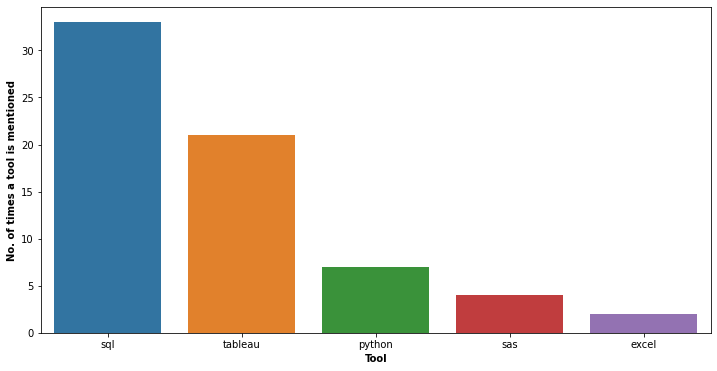

In [33]:
# A bar plot of all tools in demand weekly vs the number of times a tool is mentioned in  job posts
plt.figure(figsize=(12, 6))
sns.barplot(y=demand_sort, x=demand_sort.index)
plt.ylabel('No. of times a tool is mentioned', weight='bold')
plt.xlabel('Tool', weight='bold');

In [35]:
# Percentage growth of skills in demand 
growth = ((demand - initial)/initial.sum())*100
growth.sort_values(ascending=False)

sql        54.8387
tableau    35.4839
python     12.9032
sas        9.67742
excel      3.22581
Name: Skill, dtype: object